In [456]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns; sns.set(style ='white', color_codes = True)
import codes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [361]:
fmld171 = pd.read_csv('diary17/fmld171.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld172 = pd.read_csv('diary17/fmld172.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld173 = pd.read_csv('diary17/fmld173.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld174 = pd.read_csv('diary17/fmld174.csv', dtype={'NEWID': str, 'HIGH_EDU': str})

In [362]:
cex = [fmld171, fmld172, fmld173, fmld174]

In [363]:
results = pd.concat(cex, ignore_index = True)

In [608]:
grocery_columns = list(results.columns)[173:192]

In [364]:
meat_column = ['BEEF',
 'PORK',
 'OTHMEAT',
 'POULTRY',
 'SEAFOOD']

In [365]:
results['meat_spent'] = sum(results[column] for column in meat_column)

In [366]:
# results['meat_spent']

In [367]:
results['meat_per_person'] = results['meat_spent']/results['FAM_SIZE']

In [234]:
# results['FAM_SIZE'].value_counts()

In [69]:
# results['meat_per_person']

In [116]:
results['HIGH_EDU'].value_counts()

15    3038
13    2321
16    2199
12    2126
14    1277
11     536
10     148
00      13
Name: HIGH_EDU, dtype: int64

In [87]:
alc_test = results[(results['ALCBEV'] > 0)& (results['meat_per_person'] > 0)]

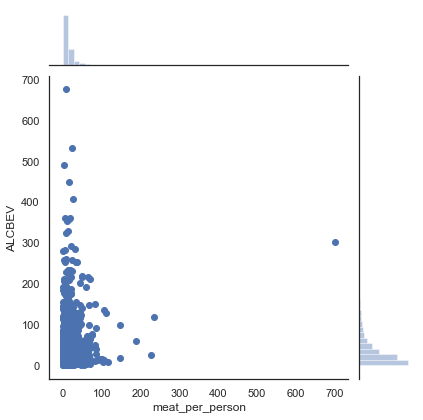

In [88]:
sns.jointplot(x= 'meat_per_person', y = 'ALCBEV', data = alc_test)

In [79]:
smoke_test = results[(results['SMOKSUPP'] > 0)& (results['meat_per_person'] > 0)]

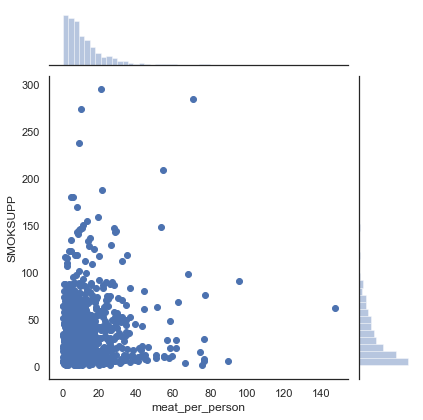

In [83]:
sns.jointplot(x= 'meat_per_person', y = 'SMOKSUPP', data = smoke_test)

In [368]:
veggie_column = ['FRSHFRUT',
 'FRSHVEG',
 'PROCFRUT',
 'PROCVEG']

In [369]:
results['veggie_spent'] = sum(results[column] for column in veggie_column)

In [370]:
results['veggie_per_person'] = results['veggie_spent']/results['FAM_SIZE']

In [371]:
veggie_test = results[(results['veggie_per_person'] > 0)& (results['meat_per_person'] > 0)]

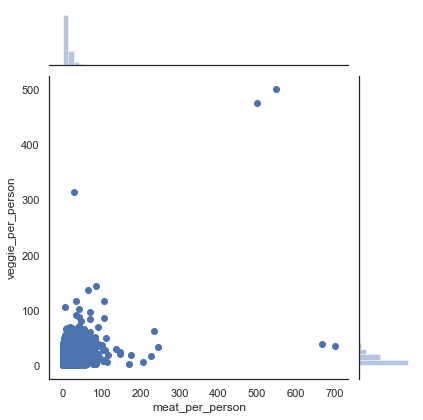

In [90]:
sns.jointplot(x= 'meat_per_person', y = 'veggie_per_person', data = veggie_test)

In [372]:
edu_df = pd.get_dummies(results['HIGH_EDU'], prefix = 'EDU')

In [373]:
edu_df.rename(mapper = codes.education, inplace= True, axis = 1)

In [374]:
results = results.merge(edu_df, left_index=True, right_index=True)

In [375]:
edu_df.columns

Index(['No_schooling', 'Elementary_school', 'Some_high_school',
       'High_school_graduate', 'Some_college', 'Associate_degree',
       'Bachelor_degree', 'Graduate_degree'],
      dtype='object')

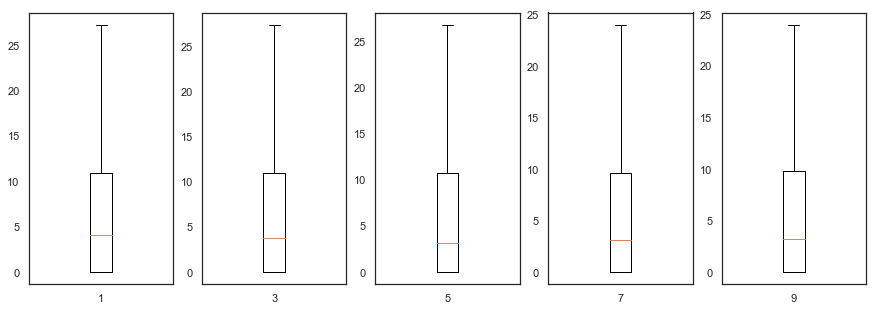

In [239]:
fig, ax = plt.subplots(1,5, figsize = (15,5))
fig.subplots_adjust(hspace = 1.2,left=None, bottom=None, right=None, top=None,wspace=None)
ax[0].boxplot(results[results['Graduate_degree'] == 1]['meat_per_person'], positions = [1], sym=  '')
ax[1].boxplot(results[results['Bachelor_degree'] == 1]['meat_per_person'], positions = [3], sym= '')
ax[2].boxplot(results[results['High_school_graduate'] == 1]['meat_per_person'], positions = [5], sym= '')
ax[3].boxplot(results[results['Some_college'] == 1]['meat_per_person'], positions = [7], sym= '')
ax[4].boxplot(results[results['Some_high_school'] == 1]['meat_per_person'], positions = [9], sym='')
plt.show()

In [240]:

print(results[results['Graduate_degree'] == 1]['meat_per_person'].mean())
print(results[results['Bachelor_degree'] == 1]['meat_per_person'].mean())
print(results[results['Some_college'] == 1]['meat_per_person'].mean())
print(results[results['High_school_graduate'] == 1]['meat_per_person'].mean())
print(results[results['Some_high_school'] == 1]['meat_per_person'].mean())

8.040829495004605
8.141240073583903
7.029656879109302
7.59483960444402
11.399704631751945


In [241]:
print(results[results['Graduate_degree'] == 1]['FAM_SIZE'].mean())
print(results[results['Bachelor_degree'] == 1]['FAM_SIZE'].mean())
print(results[results['Some_college'] == 1]['FAM_SIZE'].mean())
print(results[results['High_school_graduate'] == 1]['FAM_SIZE'].mean())
print(results[results['Some_high_school'] == 1]['FAM_SIZE'].mean())

2.618917689859027
2.531928900592495
2.408875484704869
2.266698024459078
2.3227611940298507


In [242]:
print(results[results['Graduate_degree'] == 1]['FINCBEF5'].mean())
print(results[results['Bachelor_degree'] == 1]['FINCBEF5'].mean())
print(results[results['Some_college'] == 1]['FINCBEF5'].mean())
print(results[results['High_school_graduate'] == 1]['FINCBEF5'].mean())
print(results[results['Some_high_school'] == 1]['FINCBEF5'].mean())

139404.6539336062
97063.21757735353
55689.69237397674
43127.01222953904
28669.152985074626


In [376]:
urban_income = results[(results['BLS_URBN'] == 1) & (results['FINCBEF5'] > 0)]['meat_per_person']/\
                results[(results['BLS_URBN'] == 1) & (results['FINCBEF5'] > 0)]['FINCBEF5']

In [377]:
urban_income.mean()

0.003708400629546656

In [378]:
rural_income = results[(results['BLS_URBN'] == 2) & (results['FINCBEF5'] > 0)]['meat_per_person']/\
                results[(results['BLS_URBN'] == 2) & (results['FINCBEF5'] > 0)]['FINCBEF5']

In [379]:
rural_income.mean()

0.0004511685122968241

In [380]:
results['SEX_REF'] = np.where(results['SEX_REF'] == 1,'Male', 'Female')

In [381]:
results['SEX_REF']

0          Male
1          Male
2        Female
3        Female
4          Male
5          Male
6        Female
7        Female
8          Male
9          Male
10       Female
11       Female
12         Male
13         Male
14         Male
15       Female
16       Female
17       Female
18       Female
19         Male
20         Male
21         Male
22         Male
23       Female
24       Female
25         Male
26         Male
27       Female
28       Female
29         Male
          ...  
11628    Female
11629    Female
11630    Female
11631    Female
11632      Male
11633      Male
11634    Female
11635    Female
11636    Female
11637    Female
11638      Male
11639      Male
11640      Male
11641      Male
11642    Female
11643    Female
11644      Male
11645      Male
11646      Male
11647      Male
11648      Male
11649      Male
11650    Female
11651    Female
11652    Female
11653    Female
11654    Female
11655    Female
11656      Male
11657      Male
Name: SEX_REF, Length: 1

In [382]:
sex_df = pd.get_dummies(results['SEX_REF'])

In [383]:
sex_df

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
5,0,1
6,1,0
7,1,0
8,0,1
9,0,1


In [384]:
results = results.merge(sex_df, left_index=True, right_index=True)

In [255]:
results

,INC_RNKM,INC_RNK5,INC_RNK4,INC_RNK3,INC_RNK2,INC_RNK1,INC_RANK,NEWID,AGE_REF,AGE_REF_,...,No_schooling,Elementary_school,Some_high_school,High_school_graduate,Some_college,Associate_degree,Bachelor_degree,Graduate_degree,Female,Male
0,0.704286,0.706457,0.699513,0.705671,0.709034,0.707517,0.763599,03608891,27,D,...,0,0,0,0,0,1,0,0,0,1
1,0.704573,0.706744,0.699800,0.705958,0.709321,0.707804,0.763886,03608892,27,D,...,0,0,0,0,0,1,0,0,0,1
2,0.256737,0.272063,0.260261,0.263508,0.273057,0.266441,0.375717,03608901,53,D,...,0,0,0,1,0,0,0,0,1,0
3,0.256312,0.271638,0.259836,0.263083,0.272632,0.266016,0.375292,03608902,53,D,...,0,0,0,1,0,0,0,0,1,0
4,0.346813,0.360343,0.345145,0.350655,0.364780,0.354823,0.458908,03608921,56,D,...,0,0,0,0,0,0,1,0,0,1
5,0.347984,0.361515,0.346317,0.351826,0.365952,0.355994,0.460079,03608922,56,D,...,0,0,0,0,0,0,1,0,0,1
6,0.734851,0.733405,0.727955,0.732500,0.734379,0.737004,0.788118,03608931,34,D,...,0,0,0,0,0,0,1,0,1,0
7,0.734663,0.733217,0.727767,0.732312,0.734191,0.736816,0.787930,03608932,34,D,...,0,0,0,0,0,0,1,0,1,0
8,0.358430,0.252492,0.330986,0.613276,0.322888,0.234753,0.005449,03608951,64,D,...,0,0,0,1,0,0,0,0,0,1
9,0.314041,0.100143,0.237747,0.417011,0.575435,0.150802,0.007812,03608952,64,D,...,0,0,0,1,0,0,0,0,0,1


In [385]:
men_meat = results[(results['SEX_REF'] == 'Male') &(results['meat_per_person'] > 0) & (results['meat_per_person'] < 100)]['meat_per_person']

In [386]:
women_meat =results[(results['SEX_REF'] == 'Female') & (results['meat_per_person'] > 0) & (results['meat_per_person'] < 100)]['meat_per_person']

In [387]:
men_veggie = results[(results['SEX_REF'] == 'Male') & (results['veggie_per_person'] > 0)  & (results['veggie_per_person'] < 70)]['veggie_per_person']

In [388]:
women_veggie = results[(results['SEX_REF'] == 'Female') & (results['veggie_per_person'] > 0) & (results['veggie_per_person'] < 70)]['veggie_per_person']

596.0
463.0


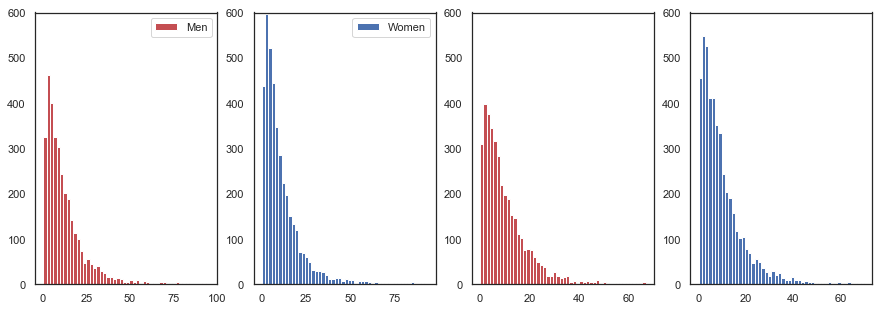

In [487]:
fig, ax = plt.subplots(1,4, figsize = (15,5))
# fig.subplots_adjust(hspace = 1.2,left=None, bottom=None, right=None, top=None,wspace=None)
men = 'Men'
women = 'Women'
men_meat_n, men_meat_bins, men_meat_patches = ax[0].hist(men_meat, color= 'r', bins = 50, label = men)
women_meat_n, women_meat_bins, women_meat_patches = ax[1].hist(women_meat, bins = 50, label = women)
men_veggie_n, men_veggie_bins, men_veggie_patches = ax[2].hist(men_veggie, color = 'r', bins = 50, label = men)
women_veggie_n, women_veggie_bins, women_veggie_patches = ax[3].hist(women_veggie, bins = 50, label = women)
[axis.set_ylim([0, 600]) for axis in ax]
print(women_meat_n[np.argmax(women_meat_n)])
print(men_meat_n[np.argmax(men_meat_n)])
ax[0].legend()
ax[1].legend()
plt.show()

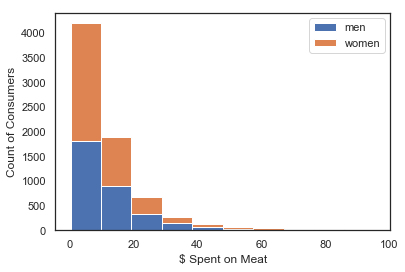

In [836]:
fig, axes = plt.subplots()

labels = ['men', 'women']
x = [men_meat, women_meat]
axes.hist(x, bins = 10, histtype='bar', stacked=True, label = labels)
plt.legend(labels)
plt.xlabel('$ Spent on Meat')
plt.ylabel('Count of Consumers')
plt.show()

In [341]:
results[(results.meat_per_person > 2.19) & (results.meat_per_person < 2.40)]['meat_per_person'].count()

92

In [391]:
results['OCCULIS1'] = results['OCCULIS1'].fillna(18.0).astype('int64')

In [392]:
results['OCCULIS1'] = results['OCCULIS1'].apply(lambda x: codes.occupation['OCCULIS1'][x] if x is not None else 19)
#len(codes.occupation['OCCULIS1'])

In [393]:
results['OCCULIS1'].value_counts()

Unknown                                       3943
Administrative support, including clerical    1741
Machine operator, assembler, inspector        1214
Teacher                                        917
Transportation operator                        600
Sales, retail                                  556
Sales, business goods and services             537
Protective service                             484
Professional                                   471
Handler, helper, laborer                       445
Technician                                     322
Other service                                  155
Private household service                      102
Mechanic, repairer, precision production        95
Farming                                         40
Construction, mining                            36
Name: OCCULIS1, dtype: int64

In [424]:
occ_df = pd.get_dummies(results['OCCULIS1'], prefix = 'OCC')

In [426]:
results = results.merge(occ_df, right_index = True, left_index= True)

IndexError: index 6 is out of bounds for axis 0 with size 6

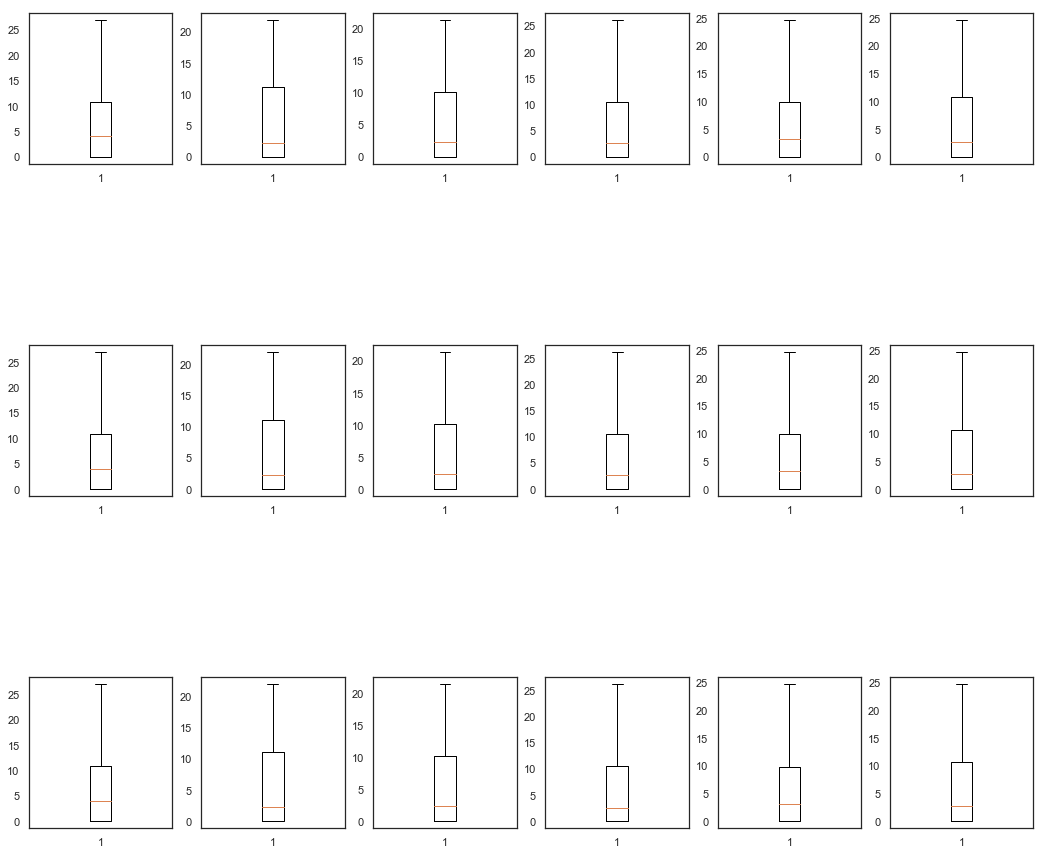

In [437]:
fig, ax = plt.subplots(3,6, figsize = (18,15))
fig.subplots_adjust(hspace = 1.2,left=None, bottom=None, right=None, top=None,wspace=None)
[axis[idx].boxplot(results[results[occupation] == 1]['meat_per_person'], sym='') \
    for idx, occupation in enumerate(occ_df.columns) for axis in ax]
plt.show()

In [443]:
[(occupation, results[results[occupation] == 1]['meat_per_person'].mean()) for occupation in occ_df.columns]

[('OCC_Administrative support, including clerical', 7.979751003587616),
 ('OCC_Construction, mining', 6.143133425925928),
 ('OCC_Farming', 8.640548749999999),
 ('OCC_Handler, helper, laborer', 7.024903457856253),
 ('OCC_Machine operator, assembler, inspector', 7.215618456532257),
 ('OCC_Mechanic, repairer, precision production', 8.991378605263158),
 ('OCC_Other service', 6.949884953791372),
 ('OCC_Private household service', 8.190647151960782),
 ('OCC_Professional', 6.855078904518213),
 ('OCC_Protective service', 7.7282854574150575),
 ('OCC_Sales, business goods and services', 7.295196296887471),
 ('OCC_Sales, retail', 8.635795271582735),
 ('OCC_Teacher', 7.676012605481124),
 ('OCC_Technician', 7.311992699719028),
 ('OCC_Transportation operator', 8.08079804435846),
 ('OCC_Unknown', 8.33556595571197)]

In [459]:
results = results[results['FINCBEF5'] >= 0]

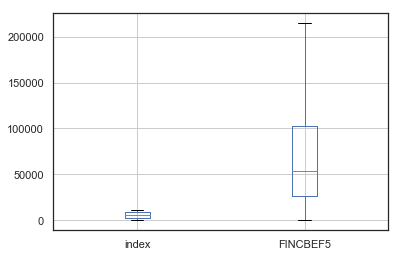

In [460]:
results['FINCBEF5'].reset_index().boxplot(sym='')

In [467]:
scipy.stats.pearsonr(results['FINCBEF5'], results['meat_per_person'])

(0.029531888563265836, 0.0014311542608196508)

In [465]:
scipy.stats.pearsonr(results['AGE_REF'], results['meat_per_person'])

(0.06879358352373038, 1.0519145525116934e-13)

In [463]:
scipy.stats.pearsonr(results['veggie_per_person'], results['meat_per_person'])

(0.5098690938525886, 0.0)

In [468]:
scipy.stats.pearsonr(results['ALCBEV'], results['meat_per_person'])

(0.11346998994524343, 1.0590048632132695e-34)

In [485]:
# scipy.stats.pearsonr(results['SEX_REF'], results['meat_per_person'])

In [470]:
scipy.stats.pearsonr(results['SMOKSUPP'], results['meat_per_person'])

(0.03287116806616181, 0.00038671161588218166)

In [477]:
scipy.stats.pearsonr(results['FINCBEF5'],results['veggie_per_person'])

(0.08099846577682354, 2.002286492533743e-18)

In [488]:
scipy.stats.pearsonr(results['AGE_REF'], results['veggie_per_person'])

(0.08974902095634897, 2.818415540788323e-22)

In [486]:
results['SEX_REF'].value_counts()

Female    6353
Male      5300
Name: SEX_REF, dtype: int64

In [498]:
results['REFGEN'].dtype

dtype('int64')

In [499]:
results['generation'] = results['REFGEN'].apply(lambda x: codes.refgen[x])


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [501]:
gen_df = pd.get_dummies(results['generation'])

In [503]:
results = results.merge(gen_df, left_index=True, right_index=True)

In [505]:
[(generation, results[results[generation] == 1]['meat_per_person'].mean()) for generation in gen_df.columns]

[('Baby_boomers', 9.57414173629426),
 ('Gen_x', 7.4127865491933695),
 ('Greatest_gen', 8.030506348973892),
 ('Millennials', 5.589463104937554)]

In [511]:
results['REGION'] = results['REGION'].fillna(0)

In [513]:
results['region'] = results['REGION'].apply(lambda x: codes.region[int(x)])


In [515]:
region_df = pd.get_dummies(results['region'])

In [517]:
results = results.merge(region_df, left_index=True, right_index=True)

In [518]:
[(region, results[results[region] == 1]['meat_per_person'].mean()) for region in region_df.columns]

[('Midwest', 7.437362777302336),
 ('Northeast', 8.424245956708937),
 ('South', 7.577703845603099),
 ('Unknown', 7.719573605119822),
 ('West', 8.346208560148346)]

In [519]:
[(region, results[results[region] == 1]['FINCBEF5'].median()) for region in region_df.columns]

[('Midwest', 55489.5),
 ('Northeast', 59081.0),
 ('South', 50369.0),
 ('Unknown', 43507.0),
 ('West', 58668.5)]

In [551]:
labels = [str(first)+'-'+str(second) for first, second in zip(range(0,840000,20000),range(20000,860000,20000))]

['0-20000',
 '20000-40000',
 '40000-60000',
 '60000-80000',
 '80000-100000',
 '100000-120000',
 '120000-140000',
 '140000-160000',
 '160000-180000',
 '180000-200000',
 '200000-220000',
 '220000-240000',
 '240000-260000',
 '260000-280000',
 '280000-300000',
 '300000-320000',
 '320000-340000',
 '340000-360000',
 '360000-380000',
 '380000-400000',
 '400000-420000',
 '420000-440000',
 '440000-460000',
 '460000-480000',
 '480000-500000',
 '500000-520000',
 '520000-540000',
 '540000-560000',
 '560000-580000',
 '580000-600000',
 '600000-620000',
 '620000-640000',
 '640000-660000',
 '660000-680000',
 '680000-700000',
 '700000-720000',
 '720000-740000',
 '740000-760000',
 '760000-780000',
 '780000-800000',
 '800000-820000',
 '820000-840000']

In [552]:
len(labels)

42

In [553]:
results['bucketed_income'] = pd.cut(results['FINCBEF5'], bins =42,labels=labels)
# results['FINCBEF5'].max()/5000

In [556]:
results['bucketed_income'] = results['bucketed_income'].apply(lambda x: '80000-840000' if int(x.split('-')[0]) >= 80000 else x)

In [557]:
income_df = pd.get_dummies(results['bucketed_income'], prefix='Income')

In [558]:
results = results.merge(income_df, left_index=True, right_index=True)

In [559]:
[(income, results[results[income] == 1]['meat_per_person'].mean()) for income in income_df.columns]

[('Income_0-20000', 7.421014599690373),
 ('Income_20000-40000', 7.525454204514291),
 ('Income_40000-60000', 7.4976373821001),
 ('Income_60000-80000', 7.399756517912789),
 ('Income_80000-840000', 8.659499042817997)]

In [573]:
occupation_dictionary = dict(zip(['OCC_' + occupation for occupation in codes.occupation['OCCULIS1']],\
         ['OCC_'+occupation for occupation in codes.occupation['SHORT_OCC']]))

In [579]:
results = results.rename(mapper=occupation_dictionary, axis=1)

In [580]:
# filter_col = [col for col in new_df if col.startswith('OCC')]
# new_df[filter_col]

In [657]:
results['marital_status'] = results['MARITAL1'].apply(lambda x: codes.marital[x])

In [658]:
marital_df = pd.get_dummies(results['marital_status'])

In [660]:
results = results.merge(marital_df, left_index=True, right_index=True)

In [661]:
[(m_status, results[results[m_status] == 1]['meat_per_person'].mean()) for m_status in marital_df.columns]

[('Divorced', 7.757680001705135),
 ('Married', 8.001352057655062),
 ('Never_married', 7.155409361390292),
 ('Separated', 8.15871304440665),
 ('Widowed', 8.998246006010246)]

In [664]:
results['family_size'] = results['FAM_SIZE'].apply(lambda x: 0 if x > 4 else x)

In [666]:
fam_size_df = pd.get_dummies(results['family_size'], prefix="Fam")

In [668]:
fam_map = {'Fam_0': 'Fam_greater_than_4', 'Fam_1': 'Fam_one_member', 'Fam_2': 'Fam_two_members',\
           'Fam_3': 'Fam_three_members', 'Fam_4': 'Fam_four_members'}
fam_size_df = fam_size_df.rename(mapper=fam_map, axis=1)

In [670]:
results = results.merge(fam_size_df, left_index=True, right_index=True)

In [672]:
[(fam, results[results[fam] == 1]['meat_per_person'].mean()) for fam in fam_size_df.columns]

[('Fam_greater_than_4', 5.09392444058187),
 ('Fam_one_member', 8.946745480710364),
 ('Fam_two_members', 8.929060487005097),
 ('Fam_three_members', 6.777505711599931),
 ('Fam_four_members', 5.945742840991981)]

In [581]:
from statsmodels.formula.api import ols

In [615]:
lr_model = ols(formula='meat_per_person~OCC_farmer+OCC_mechanic+OCC_retail+Some_high_school+Q("Income_80000-840000")+West+Northeast+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV',data=results).fit()

In [876]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax1.set_title('Histogram')
    ax2.scatter(df[target],residual)
    ax2.plot(np.unique(df[target]), np.poly1d(np.polyfit(df[target], residual, 1))(np.unique(df[target])), c='Red')
    print( np.poly1d(np.polyfit(df[target], residual, 1)))
    ax2.set_title('Scatterplot')
    plt.show()

 
0.7162 x - 5.648


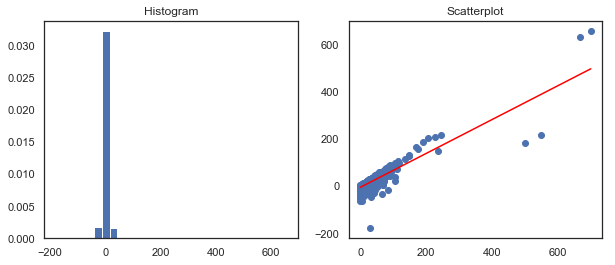

In [877]:
checkresiduals(results, 'meat_per_person', lr_model)

In [618]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        meat_per_person   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     349.3
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:42:17   Log-Likelihood:                -47542.
No. Observations:               11653   AIC:                         9.511e+04
Df Residuals:                   11639   BIC:                         9.521e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.0737      0.228      4.703      0.000       0.626       1.521
OCC_farmer                   2.1603      2.328      0.928      0.353      -2.403       6.724
OCC_mechanic                 1.0143      1.477      0.687      0.492      -1.881       3.910
OCC_retail                   1.0097      0.623      1.621      0.105      -0.211       2.231
Some_high_school             3.8094      0.641      5.940      0.000       2.552       5.066
Q("Income_80000-840000")    -0.5675      0.289     -1.962      0.050      -1.134      -0.000
West                        -0.6674      0.329     -2.030      0.042      -1.312      -0.023
Northeast                   -0.3334      0.358     -0.931      0.352      -1.035       0.368
veggie_per_person            0.6552      0.012     56.241      0.000       0.632       0.678
EGGS                         0.2739      0.062      4.393      0.000       0.152       0.396
OILS                         0.1844      0.029      6.352      0.000       0.128       0.241
NONALBEV                     0.1012      0.011      9.124      0.000       0.079       0.123
SMOKSUPP                     0.0364      0.008      4.297      0.000       0.020       0.053
ALCBEV                       0.0305      0.005      6.558      0.000       0.021       0.040
==============================================================================
Omnibus:                    24836.794   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        267337775.049
Skew:                          18.340   Prob(JB):                         0.00
Kurtosis:                     744.115   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [610]:
for column_name in grocery_columns:
    print(column_name, scipy.stats.pearsonr(results[column_name], results['meat_per_person']))

EGGS (0.17303076040519869, 5.315961348451631e-79)
MILKPROD (0.16137882616569615, 7.901349732784161e-69)
OTHDAIRY (0.19335588220958022, 1.516241167444581e-98)
FRSHFRUT (0.29723010494789176, 2.4317332712268716e-236)
FRSHVEG (0.3755940457442828, 0.0)
PROCFRUT (0.15153153846441475, 8.248130341877271e-61)
PROCVEG (0.209216543233265, 2.0382908139364843e-115)
SWEETS (0.11353426558992247, 9.710885649865121e-35)
NONALBEV (0.21169699294173805, 3.46980422808352e-118)
OILS (0.18736641571353313, 1.5154000149956252e-92)
MISCFOOD (0.2037956692923976, 1.7271488270118136e-109)
FOODAWAY (0.07944527058954123, 8.795916429619784e-18)
ALCBEV (0.11346998994524343, 1.0590048632132695e-34)
SMOKSUPP (0.03287116806616181, 0.00038671161588218166)
PET_FOOD (0.015295627529921448, 0.09872467073882205)
PERSPROD (0.06001300060445831, 8.962123673908878e-11)
PERSSERV (0.029595152226262852, 0.0013976979379373862)
DRUGSUPP (0.013681967252900419, 0.13971150317239922)
HOUSKEEP (0.08142153293186077, 1.3314299868555074e-18)


In [631]:
import sys
regions = '+'.join(['Northeast','Midwest','West','South'])
jobs = list(occupation_dictionary.values())
jobs.remove('OCC_outdoor')
jobs.remove('OCC_manager')
jobs.remove('OCC_military')
Occupations = '+'.join(jobs)
education_levels = '+'.join(edu_df.columns)
income_level = '")+Q("'.join(income_df.columns)
income_level = 'Q("' + income_level + '")'
lr_model2 = ols(formula='meat_per_person~'+Occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV',data=results).fit()

In [632]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        meat_per_person   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     127.9
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:41:11   Log-Likelihood:                -47516.
No. Observations:               11653   AIC:                         9.511e+04
Df Residuals:                   11616   BIC:                         9.538e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.3111      0.619      2.119      0.034       0.098       2.524
OCC_teacher                 -0.2149      0.529     -0.407      0.684      -1.251       0.821
OCC_professional            -0.1525      0.693     -0.220      0.826      -1.511       1.206
OCC_admin                   -0.3692      0.445     -0.830      0.407      -1.241       0.503
OCC_retail                   0.8833      0.633      1.396      0.163      -0.357       2.123
OCC_sales                    0.0993      0.640      0.155      0.877      -1.156       1.355
OCC_technician              -1.1335      0.799     -1.419      0.156      -2.699       0.432
OCC_security                 0.3558      0.673      0.529      0.597      -0.963       1.674
OCC_household                0.3202      1.360      0.235      0.814      -2.346       2.986
OCC_service                 -1.4099      1.124     -1.255      0.210      -3.613       0.793
OCC_machinist               -0.0629      0.474     -0.133      0.895      -0.992       0.867
OCC_driver                   1.1722      0.618      1.898      0.058      -0.038       2.383
OCC_laborer                 -0.2870      0.696     -0.412      0.680      -1.651       1.077
OCC_mechanic                 0.7039      1.413      0.498      0.618      -2.067       3.475
OCC_construction            -1.0398      2.257     -0.461      0.645      -5.463       3.383
OCC_farmer                   2.0866      2.200      0.949      0.343      -2.225       6.398
OCC_unknown                  0.3595      0.361      0.995      0.320      -0.349       1.068
No_schooling                -3.7516      3.526     -1.064      0.287     -10.664       3.161
Elementary_school           -0.2712      1.147     -0.236      0.813      -2.519       1.977
Some_high_school             4.0610      0.734      5.533      0.000       2.622       5.500
High_school_graduate         0.9504      0.560      1.698      0.089      -0.146       2.047
Some_college                 0.5522      0.555      0.996      0.320      -0.535       1.639
Associate_degree             0.9358      0.604      1.550      0.121      -0.248       2.119
Bachelor_degree              0.0622      0.550      0.113      0.910      -1.015       1.140
Graduate_degree             -1.2277      0.589     -2.083      0.037      -2.383      -0.072
Q("Income_0-20000")          0.2829      0.330      0.857      0.392      -0.364       0.930
Q("Income_20000-40000")      0.2471      0.302      0.817      0.414      -0.346       0.840
Q("Income_40000-60000")      0.4724      0.321      1.472      0.141      -0.157       1.101
Q("Income_60000-80000")     -0.1361      0.370     -0.368      0.713      -0.862       0.590
Q("Income_80000-840000")     0.4448      0.290      1.533      0.125      -0.124       1.013
Northeast     

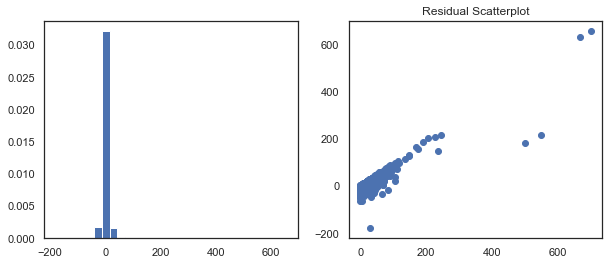

In [633]:
checkresiduals(results, 'meat_per_person', lr_model2)

In [638]:
import sys
regions = '+'.join(['Northeast','Midwest','West','South'])
jobs = list(occupation_dictionary.values())
jobs.remove('OCC_outdoor')
jobs.remove('OCC_manager')
jobs.remove('OCC_military')
occupations = '+'.join(jobs)
education_levels = '+'.join(edu_df.columns)
income_level = '")+Q("'.join(income_df.columns)
income_level = 'Q("' + income_level + '")'
generations = '+'.join(gen_df.columns)
genders = '+'.join(sex_df.columns)
lr_model3 = ols(formula='meat_per_person~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders,data=results).fit()

In [639]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        meat_per_person   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     116.5
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:01:44   Log-Likelihood:                -47495.
No. Observations:               11653   AIC:                         9.507e+04
Df Residuals:                   11612   BIC:                         9.537e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.8789      0.402      2.188      0.029       0.092       1.666
OCC_teacher                 -0.2810      0.529     -0.531      0.595      -1.318       0.756
OCC_professional             0.1444      0.699      0.206      0.836      -1.227       1.516
OCC_admin                   -0.3098      0.445     -0.695      0.487      -1.183       0.563
OCC_retail                   1.1280      0.641      1.759      0.079      -0.129       2.385
OCC_sales                    0.1566      0.641      0.244      0.807      -1.100       1.413
OCC_technician              -1.0971      0.798     -1.375      0.169      -2.661       0.467
OCC_security                 0.1868      0.673      0.277      0.781      -1.133       1.507
OCC_household                0.0999      1.360      0.073      0.941      -2.565       2.765
OCC_service                 -1.3733      1.128     -1.217      0.223      -3.584       0.838
OCC_machinist               -0.1156      0.475     -0.243      0.808      -1.047       0.816
OCC_driver                   0.9230      0.621      1.486      0.137      -0.294       2.140
OCC_laborer                 -0.6482      0.702     -0.924      0.356      -2.024       0.727
OCC_mechanic                 0.3974      1.413      0.281      0.778      -2.371       3.166
OCC_construction            -1.0581      2.253     -0.470      0.639      -5.475       3.359
OCC_farmer                   2.6169      2.201      1.189      0.235      -1.698       6.932
OCC_unknown                  0.1089      0.398      0.274      0.784      -0.671       0.889
No_schooling                -3.4229      3.510     -0.975      0.330     -10.304       3.458
Elementary_school           -0.2565      1.147     -0.224      0.823      -2.505       1.992
Some_high_school             4.0180      0.742      5.415      0.000       2.564       5.473
High_school_graduate         0.7794      0.572      1.363      0.173      -0.341       1.900
Some_college                 0.4363      0.567      0.769      0.442      -0.676       1.548
Associate_degree             0.7802      0.616      1.266      0.205      -0.428       1.988
Bachelor_degree             -0.0402      0.563     -0.071      0.943      -1.143       1.062
Graduate_degree             -1.4154      0.600     -2.359      0.018      -2.592      -0.239
Q("Income_0-20000")          0.3079      0.318      0.969      0.333      -0.315       0.931
Q("Income_20000-40000")      0.2398      0.289      0.829      0.407      -0.327       0.807
Q("Income_40000-60000")      0.4120      0.306      1.345      0.179      -0.188       1.012
Q("Income_60000-80000")     -0.2504      0.355     -0.704      0.481      -0.947       0.446
Q("Income_80000-840000")     0.1697      0.278      0.610      0.542      -0.375       0.715
Northeast     

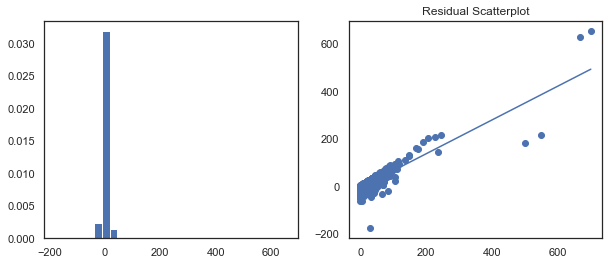

In [651]:
checkresiduals(results, 'meat_per_person', lr_model3)

In [673]:
import statsmodels.api as sm
western_mechanic_hs_male = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,50.0,6.0,3.0,7,0,30,1,0,0,0,0,1]
western_mechanic_hs_male = sm.add_constant(western_mechanic_hs_male)


In [676]:
import sys
regions = '+'.join(['Northeast','Midwest','West','South'])
jobs = list(occupation_dictionary.values())
jobs.remove('OCC_outdoor')
jobs.remove('OCC_manager')
jobs.remove('OCC_military')
occupations = '+'.join(jobs)
education_levels = '+'.join(edu_df.columns)
income_level = '")+Q("'.join(income_df.columns)
income_level = 'Q("' + income_level + '")'
generations = '+'.join(gen_df.columns)
genders = '+'.join(sex_df.columns)
fam_sizes = '+'.join(fam_size_df.columns)
marital_statuses = '+'.join(marital_df.columns)
lr_model4 = ols(formula='meat_per_person~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes,data=results).fit()

In [677]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        meat_per_person   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     97.91
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:51:28   Log-Likelihood:                -47480.
No. Observations:               11653   AIC:                         9.506e+04
Df Residuals:                   11604   BIC:                         9.542e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.5788      0.348      1.661      0.097      -0.104       1.262
OCC_teacher                 -0.3151      0.529     -0.596      0.551      -1.352       0.722
OCC_professional             0.0685      0.700      0.098      0.922      -1.303       1.440
OCC_admin                   -0.4456      0.447     -0.997      0.319      -1.321       0.430
OCC_retail                   1.0189      0.642      1.588      0.112      -0.239       2.277
OCC_sales                    0.1110      0.641      0.173      0.863      -1.146       1.368
OCC_technician              -1.2185      0.797     -1.528      0.126      -2.781       0.344
OCC_security                 0.0604      0.674      0.090      0.929      -1.260       1.381
OCC_household                0.0616      1.359      0.045      0.964      -2.602       2.725
OCC_service                 -1.1156      1.129     -0.989      0.323      -3.328       1.097
OCC_machinist               -0.1129      0.476     -0.237      0.812      -1.046       0.820
OCC_driver                   1.0048      0.621      1.618      0.106      -0.213       2.222
OCC_laborer                 -0.6379      0.702     -0.909      0.363      -2.014       0.738
OCC_mechanic                 0.3383      1.412      0.240      0.811      -2.429       3.105
OCC_construction            -1.1365      2.252     -0.505      0.614      -5.551       3.278
OCC_farmer                   2.5892      2.204      1.175      0.240      -1.731       6.910
OCC_unknown                  0.3081      0.402      0.766      0.444      -0.480       1.096
No_schooling                -3.6426      3.504     -1.040      0.299     -10.511       3.225
Elementary_school           -0.1940      1.149     -0.169      0.866      -2.446       2.058
Some_high_school             4.0788      0.745      5.478      0.000       2.619       5.538
High_school_graduate         0.7553      0.575      1.313      0.189      -0.372       1.883
Some_college                 0.3973      0.571      0.696      0.487      -0.722       1.516
Associate_degree             0.7653      0.620      1.235      0.217      -0.450       1.980
Bachelor_degree             -0.1218      0.567     -0.215      0.830      -1.233       0.989
Graduate_degree             -1.4596      0.605     -2.412      0.016      -2.646      -0.274
Q("Income_0-20000")         -0.1879      0.336     -0.560      0.576      -0.846       0.470
Q("Income_20000-40000")      0.0597      0.287      0.208      0.836      -0.504       0.623
Q("Income_40000-60000")      0.3958      0.304      1.304      0.192      -0.199       0.991
Q("Income_60000-80000")     -0.2057      0.354     -0.581      0.561      -0.899       0.488
Q("Income_80000-840000")     0.5170      0.290      1.782      0.075      -0.052       1.086
Northeast     

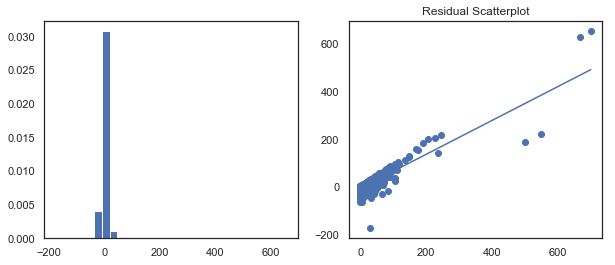

In [678]:
checkresiduals(results, 'meat_per_person', lr_model4)

In [838]:
import sys
trunc_df = results[(results['meat_per_person'] > 0) & (results['meat_per_person'] < 100)]
regions = '+'.join(['Northeast','Midwest','West','South'])
jobs = list(occupation_dictionary.values())
jobs.remove('OCC_outdoor')
jobs.remove('OCC_manager')
jobs.remove('OCC_military')
occupations = '+'.join(jobs)
education_levels = '+'.join(edu_df.columns)
income_level = '")+Q("'.join(income_df.columns)
income_level = 'Q("' + income_level + '")'
generations = '+'.join(gen_df.columns)
genders = '+'.join(sex_df.columns)
fam_sizes = '+'.join(fam_size_df.columns)
marital_statuses = '+'.join(marital_df.columns)
lr_model5 = ols(formula='meat_per_person~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes,data=trunc_df).fit()



In [839]:
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        meat_per_person   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     47.09
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:24:13   Log-Likelihood:                -27527.
No. Observations:                7312   AIC:                         5.515e+04
Df Residuals:                    7263   BIC:                         5.549e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.5841      0.336      4.713      0.000       0.925       2.243
OCC_teacher                  0.2570      0.487      0.527      0.598      -0.698       1.212
OCC_professional            -0.1323      0.641     -0.206      0.837      -1.390       1.125
OCC_admin                    0.2368      0.418      0.567      0.571      -0.582       1.056
OCC_retail                  -0.6545      0.600     -1.091      0.275      -1.830       0.521
OCC_sales                    1.3482      0.614      2.196      0.028       0.145       2.552
OCC_technician              -0.0255      0.761     -0.033      0.973      -1.518       1.467
OCC_security                -0.1676      0.628     -0.267      0.789      -1.398       1.063
OCC_household                0.1623      1.181      0.137      0.891      -2.154       2.478
OCC_service                 -0.7308      1.028     -0.711      0.477      -2.745       1.284
OCC_machinist                0.3342      0.451      0.741      0.459      -0.550       1.218
OCC_driver                  -0.0050      0.593     -0.008      0.993      -1.168       1.158
OCC_laborer                 -0.0787      0.668     -0.118      0.906      -1.387       1.230
OCC_mechanic                 1.4894      1.394      1.068      0.286      -1.244       4.223
OCC_construction             0.2583      2.277      0.113      0.910      -4.205       4.721
OCC_farmer                  -1.3705      2.229     -0.615      0.539      -5.740       2.999
OCC_unknown                  0.6626      0.382      1.733      0.083      -0.087       1.412
No_schooling                -4.9994      3.508     -1.425      0.154     -11.876       1.877
Elementary_school            0.7089      1.136      0.624      0.533      -1.518       2.936
Some_high_school             1.7357      0.726      2.390      0.017       0.312       3.159
High_school_graduate         1.3056      0.566      2.305      0.021       0.195       2.416
Some_college                 0.8207      0.563      1.457      0.145      -0.283       1.925
Associate_degree             1.4354      0.603      2.380      0.017       0.253       2.618
Bachelor_degree              0.5913      0.558      1.060      0.289      -0.502       1.684
Graduate_degree             -0.0141      0.591     -0.024      0.981      -1.173       1.145
Q("Income_0-20000")          0.1343      0.333      0.403      0.687      -0.519       0.787
Q("Income_20000-40000")      0.2800      0.273      1.024      0.306      -0.256       0.816
Q("Income_40000-60000")      0.3248      0.282      1.153      0.249      -0.228       0.877
Q("Income_60000-80000")     -0.0140      0.329     -0.042      0.966      -0.660       0.632
Q("Income_80000-840000")     0.8590      0.267      3.214      0.001       0.335       1.383
Northeast     

 
0.7627 x - 9.023


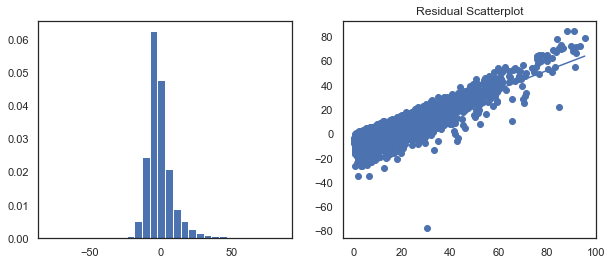

In [847]:
checkresiduals(trunc_df, 'meat_per_person', lr_model5)

(array([  17.,   82.,  317.,  682., 1146., 1687., 1701., 1135.,  424.,
         121.]),
 array([-1.35673556, -0.76509704, -0.17345851,  0.41818001,  1.00981853,
         1.60145706,  2.19309558,  2.7847341 ,  3.37637262,  3.96801115,
         4.55964967]),
 <a list of 10 Patch objects>)

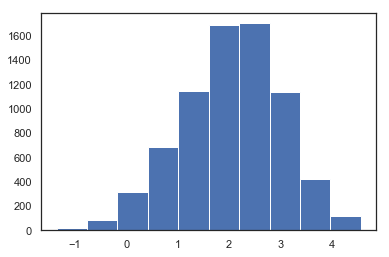

In [849]:
plt.hist(np.log(trunc_df['meat_per_person']))

In [850]:
trunc_df['meat_log'] = np.log(trunc_df['meat_per_person'])

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [853]:
import sys
trunc_df = results[(results['meat_per_person'] > 0) & (results['meat_per_person'] < 100)]
trunc_df['meat_log'] = np.log(trunc_df['meat_per_person'])
regions = '+'.join(['Northeast','Midwest','West','South'])
jobs = list(occupation_dictionary.values())
jobs.remove('OCC_outdoor')
jobs.remove('OCC_manager')
jobs.remove('OCC_military')
occupations = '+'.join(jobs)
education_levels = '+'.join(edu_df.columns)
income_level = '")+Q("'.join(income_df.columns)
income_level = 'Q("' + income_level + '")'
generations = '+'.join(gen_df.columns)
genders = '+'.join(sex_df.columns)
fam_sizes = '+'.join(fam_size_df.columns)
marital_statuses = '+'.join(marital_df.columns)
lr_model6 = ols(formula='meat_log~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes,data=trunc_df).fit()


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [854]:
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               meat_log   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     52.45
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:36:53   Log-Likelihood:                -9013.4
No. Observations:                7312   AIC:                         1.812e+04
Df Residuals:                    7263   BIC:                         1.846e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.5382      0.027     20.142      0.000       0.486       0.591
OCC_teacher                  0.0057      0.039      0.148      0.882      -0.070       0.082
OCC_professional            -0.0579      0.051     -1.135      0.256      -0.158       0.042
OCC_admin                    0.0246      0.033      0.739      0.460      -0.041       0.090
OCC_retail                  -0.0559      0.048     -1.172      0.241      -0.149       0.038
OCC_sales                    0.0744      0.049      1.524      0.128      -0.021       0.170
OCC_technician              -0.0173      0.061     -0.286      0.775      -0.136       0.101
OCC_security                 0.0527      0.050      1.057      0.291      -0.045       0.151
OCC_household                0.0858      0.094      0.913      0.361      -0.098       0.270
OCC_service                 -0.0049      0.082     -0.060      0.953      -0.165       0.155
OCC_machinist                0.0365      0.036      1.017      0.309      -0.034       0.107
OCC_driver                  -0.0153      0.047     -0.325      0.745      -0.108       0.077
OCC_laborer                 -0.0018      0.053     -0.035      0.972      -0.106       0.102
OCC_mechanic                 0.1035      0.111      0.934      0.350      -0.114       0.321
OCC_construction             0.2230      0.181      1.232      0.218      -0.132       0.578
OCC_farmer                   0.0297      0.177      0.168      0.867      -0.318       0.377
OCC_unknown                  0.0554      0.030      1.823      0.068      -0.004       0.115
No_schooling                -0.3141      0.279     -1.126      0.260      -0.861       0.233
Elementary_school            0.1107      0.090      1.226      0.220      -0.066       0.288
Some_high_school             0.1818      0.058      3.150      0.002       0.069       0.295
High_school_graduate         0.1511      0.045      3.356      0.001       0.063       0.239
Some_college                 0.1331      0.045      2.973      0.003       0.045       0.221
Associate_degree             0.1430      0.048      2.983      0.003       0.049       0.237
Bachelor_degree              0.0822      0.044      1.853      0.064      -0.005       0.169
Graduate_degree              0.0503      0.047      1.071      0.284      -0.042       0.142
Q("Income_0-20000")          0.0527      0.026      1.990      0.047       0.001       0.105
Q("Income_20000-40000")      0.0793      0.022      3.648      0.000       0.037       0.122
Q("Income_40000-60000")      0.0974      0.022      4.349      0.000       0.053       0.141
Q("Income_60000-80000")      0.1172      0.026      4.477      0.000       0.066       0.169
Q("Income_80000-840000")     0.1916      0.021      9.016      0.000       0.150       0.233
Northeast     

 
0.7426 x - 1.518


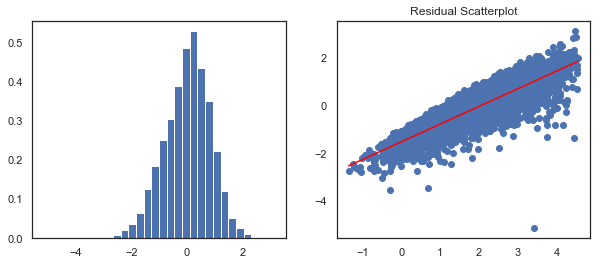

In [858]:
checkresiduals(trunc_df, 'meat_log', lr_model6)

In [868]:
import sys
meat_above_zero_df = results[(results['meat_per_person'] > 0)]
meat_above_zero_df['meat_log'] = np.log(meat_above_zero_df['meat_per_person'])
meat_above_zero_df['lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
regions = '+'.join(['Northeast','Midwest','West','South'])
jobs = list(occupation_dictionary.values())
jobs.remove('OCC_outdoor')
jobs.remove('OCC_manager')
jobs.remove('OCC_military')
occupations = '+'.join(jobs)
education_levels = '+'.join(edu_df.columns)
income_level = '")+Q("'.join(income_df.columns)
income_level = 'Q("' + income_level + '")'
generations = '+'.join(gen_df.columns)
genders = '+'.join(sex_df.columns)
fam_sizes = '+'.join(fam_size_df.columns)
marital_statuses = '+'.join(marital_df.columns)
lr_model7 = ols(formula='meat_log~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes+'+lonely_rich_man',data=meat_above_zero_df).fit()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [869]:
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               meat_log   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     52.33
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:08:39   Log-Likelihood:                -9147.1
No. Observations:                7336   AIC:                         1.839e+04
Df Residuals:                    7286   BIC:                         1.874e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.5464      0.027     20.198      0.000       0.493       0.599
OCC_teacher                 -0.0107      0.039     -0.274      0.784      -0.088       0.066
OCC_professional            -0.0771      0.052     -1.492      0.136      -0.178       0.024
OCC_admin                    0.0162      0.034      0.481      0.630      -0.050       0.082
OCC_retail                  -0.0413      0.048     -0.857      0.391      -0.136       0.053
OCC_sales                    0.0620      0.049      1.254      0.210      -0.035       0.159
OCC_technician              -0.0228      0.061     -0.373      0.710      -0.143       0.097
OCC_security                 0.0324      0.050      0.642      0.521      -0.067       0.131
OCC_household                0.0646      0.095      0.679      0.497      -0.122       0.251
OCC_service                 -0.0033      0.083     -0.040      0.968      -0.166       0.159
OCC_machinist                0.0291      0.036      0.803      0.422      -0.042       0.100
OCC_driver                  -0.0125      0.048     -0.262      0.793      -0.106       0.081
OCC_laborer                 -0.0150      0.054     -0.279      0.780      -0.120       0.090
OCC_mechanic                 0.1365      0.111      1.225      0.221      -0.082       0.355
OCC_construction             0.2201      0.184      1.199      0.230      -0.140       0.580
OCC_farmer                   0.1183      0.176      0.674      0.500      -0.226       0.462
OCC_unknown                  0.0498      0.031      1.623      0.105      -0.010       0.110
No_schooling                -0.3176      0.283     -1.123      0.262      -0.872       0.237
Elementary_school            0.1099      0.092      1.200      0.230      -0.070       0.289
Some_high_school             0.1804      0.058      3.097      0.002       0.066       0.295
High_school_graduate         0.1437      0.046      3.146      0.002       0.054       0.233
Some_college                 0.1325      0.045      2.917      0.004       0.043       0.221
Associate_degree             0.1464      0.049      3.011      0.003       0.051       0.242
Bachelor_degree              0.0900      0.045      2.002      0.045       0.002       0.178
Graduate_degree              0.0612      0.048      1.284      0.199      -0.032       0.155
Q("Income_0-20000")          0.0475      0.027      1.760      0.078      -0.005       0.101
Q("Income_20000-40000")      0.0804      0.022      3.655      0.000       0.037       0.124
Q("Income_40000-60000")      0.0989      0.023      4.356      0.000       0.054       0.143
Q("Income_60000-80000")      0.1250      0.027      4.715      0.000       0.073       0.177
Q("Income_80000-840000")     0.1945      0.022      8.863      0.000       0.151       0.238
Northeast     

 
0.7399 x - 1.52


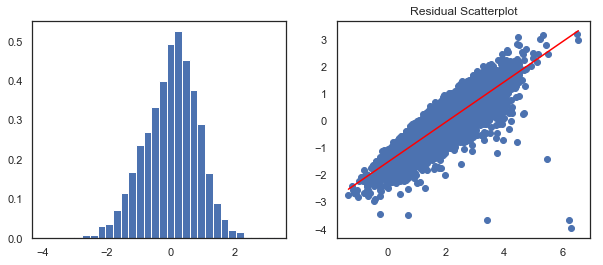

In [863]:
checkresiduals(meat_above_zero_df, 'meat_log', lr_model7)

In [872]:
import sys
meat_above_zero_df = results[(results['meat_per_person'] > 0)]
meat_above_zero_df['meat_log'] = np.log(meat_above_zero_df['meat_per_person'])
meat_above_zero_df['lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
regions = '+'.join(['Northeast','Midwest','West','South'])
jobs = list(occupation_dictionary.values())
jobs.remove('OCC_outdoor')
jobs.remove('OCC_manager')
jobs.remove('OCC_military')
occupations = '+'.join(jobs)
education_levels = '+'.join(edu_df.columns)
income_level = '")+Q("'.join(income_df.columns)
income_level = 'Q("' + income_level + '")'
generations = '+'.join(gen_df.columns)
genders = '+'.join(sex_df.columns)
fam_sizes = '+'.join(fam_size_df.columns)
marital_statuses = '+'.join(marital_df.columns)
meat_above_zero_df['age_std'] = meat_above_zero_df['AGE_REF'].std()
lr_model8 = ols(formula='meat_log~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes+'+lonely_rich_man+age_std',data=meat_above_zero_df).fit()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [873]:
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               meat_log   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     52.33
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:22:42   Log-Likelihood:                -9147.1
No. Observations:                7336   AIC:                         1.839e+04
Df Residuals:                    7286   BIC:                         1.874e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0050      0.000     20.198      0.000       0.004       0.005
OCC_teacher                 -0.0446      0.039     -1.133      0.257      -0.122       0.033
OCC_professional            -0.1109      0.052     -2.143      0.032      -0.212      -0.009
OCC_admin                   -0.0177      0.034     -0.524      0.600      -0.084       0.048
OCC_retail                  -0.0751      0.048     -1.556      0.120      -0.170       0.020
OCC_sales                    0.0282      0.050      0.568      0.570      -0.069       0.125
OCC_technician              -0.0567      0.061     -0.924      0.356      -0.177       0.064
OCC_security                -0.0014      0.051     -0.029      0.977      -0.101       0.098
OCC_household                0.0308      0.095      0.324      0.746      -0.156       0.217
OCC_service                 -0.0371      0.083     -0.449      0.654      -0.199       0.125
OCC_machinist               -0.0047      0.036     -0.129      0.897      -0.076       0.067
OCC_driver                  -0.0463      0.048     -0.969      0.333      -0.140       0.047
OCC_laborer                 -0.0489      0.054     -0.906      0.365      -0.155       0.057
OCC_mechanic                 0.1027      0.111      0.921      0.357      -0.116       0.321
OCC_construction             0.1863      0.183      1.016      0.310      -0.173       0.546
OCC_farmer                   0.0845      0.175      0.482      0.630      -0.259       0.428
OCC_unknown                  0.0159      0.031      0.514      0.607      -0.045       0.077
No_schooling                -0.3853      0.281     -1.371      0.170      -0.936       0.166
Elementary_school            0.0423      0.092      0.460      0.646      -0.138       0.223
Some_high_school             0.1127      0.059      1.895      0.058      -0.004       0.229
High_school_graduate         0.0760      0.047      1.602      0.109      -0.017       0.169
Some_college                 0.0648      0.047      1.374      0.169      -0.028       0.157
Associate_degree             0.0787      0.050      1.567      0.117      -0.020       0.177
Bachelor_degree              0.0223      0.047      0.478      0.633      -0.069       0.114
Graduate_degree             -0.0065      0.049     -0.133      0.894      -0.103       0.090
Q("Income_0-20000")         -0.0607      0.026     -2.293      0.022      -0.113      -0.009
Q("Income_20000-40000")     -0.0278      0.022     -1.292      0.196      -0.070       0.014
Q("Income_40000-60000")     -0.0094      0.022     -0.427      0.669      -0.053       0.034
Q("Income_60000-80000")      0.0167      0.026      0.651      0.515      -0.034       0.067
Q("Income_80000-840000")     0.0862      0.021      4.037      0.000       0.044       0.128
Northeast     

 
0.7397 x - 1.52


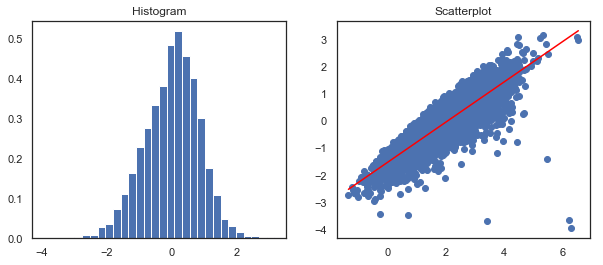

In [878]:
checkresiduals(meat_above_zero_df, 'meat_log',lr_model8)

(0.06728333794895304, 3.578050980021516e-13)
(0.029531888563265836, 0.0014311542608196508)
(-0.07967708377613301, 7.065303413799346e-18)


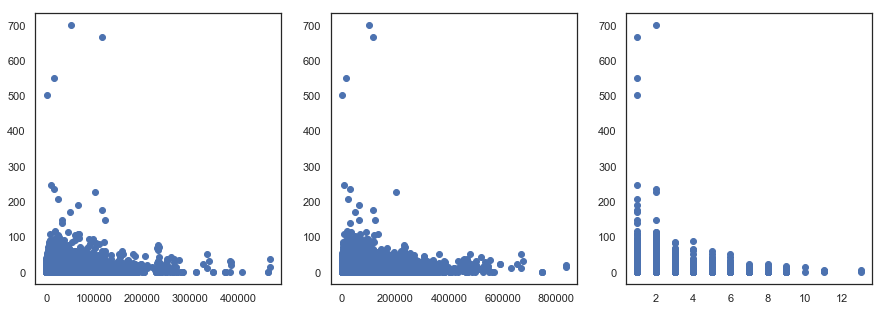

In [691]:
print(scipy.stats.pearsonr(results['FINCBEF5']/results['FAM_SIZE'], results['meat_per_person']))
print(scipy.stats.pearsonr(results['FINCBEF5'], results['meat_per_person']))
print(scipy.stats.pearsonr(results['FAM_SIZE'], results['meat_per_person']))
fig, ax = plt.subplots(1,3, figsize = (15, 5))
plt.subplot(131)
plt.scatter(results['FINCBEF5']/results['FAM_SIZE'], results['meat_per_person'])
plt.subplot(132)
plt.scatter(results['FINCBEF5'], results['meat_per_person'])
plt.subplot(133)
plt.scatter(results['FAM_SIZE'], results['meat_per_person'])
plt.show()

(-0.004007208277511477, 0.6653564655760454)
(0.009706050223237948, 0.2947900765929552)
(0.01750784047031208, 0.058771729677249064)
(0.01696340023533519, 0.06708286555011116)


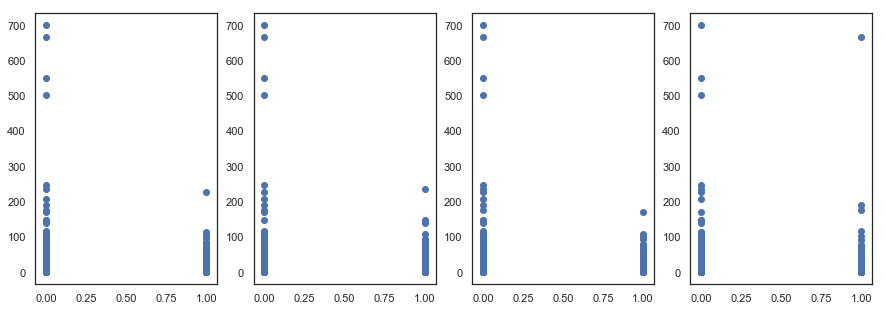

In [695]:
print(scipy.stats.pearsonr(results['South']*results['Male'], results['meat_per_person']))
print(scipy.stats.pearsonr(results['West']*results['Male'], results['meat_per_person']))
print(scipy.stats.pearsonr(results['Northeast']*results['Male'], results['meat_per_person']))
print(scipy.stats.pearsonr(results['Midwest']*results['Male'], results['meat_per_person']))
# print(scipy.stats.pearsonr(results['FINCBEF5'], results['meat_per_person']))
# print(scipy.stats.pearsonr(results['FAM_SIZE'], results['meat_per_person']))
fig, ax = plt.subplots(1,4, figsize = (15, 5))
plt.subplot(141)
plt.scatter(results['South']*results['Male'], results['meat_per_person'])
plt.subplot(142)
plt.scatter(results['West']*results['Male'], results['meat_per_person'])
plt.subplot(143)
plt.scatter(results['Northeast']*results['Male'], results['meat_per_person'])
plt.subplot(144)
plt.scatter(results['Midwest']*results['Male'], results['meat_per_person'])
plt.show()

(-0.012468167010872548, 0.17835578070516397)
(0.00995438532959509, 0.28260854228794585)
(0.0033291103244563916, 0.7193431618180215)
(-0.03124292879013727, 0.0007432521406826809)


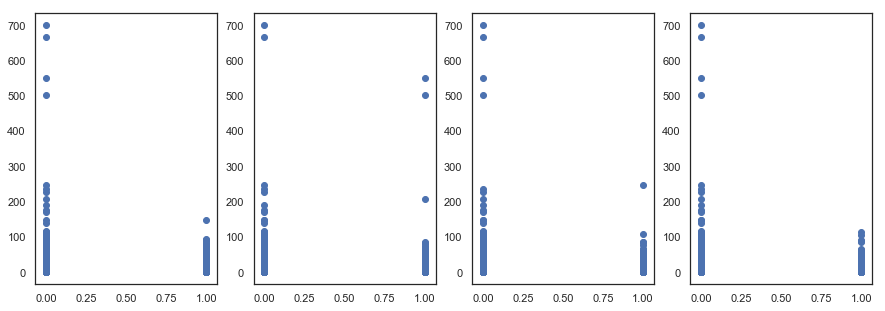

In [693]:
print(scipy.stats.pearsonr(results['South']*results['Female'], results['meat_per_person']))
print(scipy.stats.pearsonr(results['West']*results['Female'], results['meat_per_person']))
print(scipy.stats.pearsonr(results['Northeast']*results['Female'], results['meat_per_person']))
print(scipy.stats.pearsonr(results['Midwest']*results['Female'], results['meat_per_person']))
# print(scipy.stats.pearsonr(results['FINCBEF5'], results['meat_per_person']))
# print(scipy.stats.pearsonr(results['FAM_SIZE'], results['meat_per_person']))
fig, ax = plt.subplots(1,4, figsize = (15, 5))
plt.subplot(141)
plt.scatter(results['South']*results['Female'], results['meat_per_person'])
plt.subplot(142)
plt.scatter(results['West']*results['Female'], results['meat_per_person'])
plt.subplot(143)
plt.scatter(results['Northeast']*results['Female'], results['meat_per_person'])
plt.subplot(144)
plt.scatter(results['Midwest']*results['Female'], results['meat_per_person'])
plt.show()

In [696]:
len(marital_df.columns)

5

In [697]:
len(gen_df.columns)

4

Divorced Baby_boomers (0.008913596372073106, 0.3359841760444664)
Divorced Gen_x (-0.007692803086905503, 0.40633862037584834)
Divorced Greatest_gen (-0.006334491199121285, 0.4941419569371406)
Divorced Millennials (-0.010888010869896764, 0.2398909883622262)
Married Baby_boomers (0.05701103372531132, 7.337392511627524e-10)
Married Gen_x (-0.024611449671769824, 0.007886275837180863)
Married Greatest_gen (0.014153905855969349, 0.12655885422265692)
Married Millennials (-0.04533783199291861, 9.772303606806432e-07)
Never_married Baby_boomers (0.018174229583695238, 0.0497808128694593)
Never_married Gen_x (0.016308352948454435, 0.07834007509192695)
Never_married Greatest_gen (-0.004538138221616184, 0.6242487265151588)
Never_married Millennials (-0.04967638267359987, 8.083444895464039e-08)
Separated Baby_boomers (0.008867424363463496, 0.3384934305481385)
Separated Gen_x (0.0014364489453287574, 0.8767844521994008)
Separated Greatest_gen (-0.006625883115966846, 0.474492271949404)
Separated Millenni

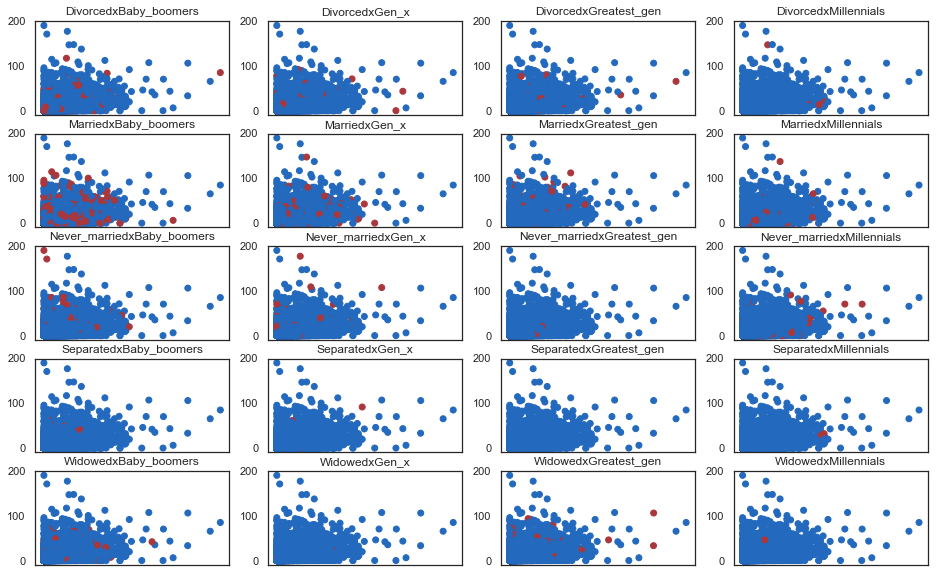

In [731]:
import itertools
fig, ax = plt.subplots(5,4, figsize = (16, 10))

for i, (status, generation) in enumerate(itertools.product(marital_df.columns,gen_df.columns)):

        print(status, generation, scipy.stats.pearsonr(results[status]*results[generation], results['meat_per_person']))
# print(scipy.stats.pearsonr(results['FINCBEF5'], results['meat_per_person']))
# print(scipy.stats.pearsonr(results['FAM_SIZE'], results['meat_per_person']))
        
        plt.subplot(5,4,i+1)
        plt.scatter(np.where(results['veggie_per_person'] < 200,results['veggie_per_person'], np.nan),\
                             np.where(results['meat_per_person'] < 200, results['meat_per_person'], np.nan), c=results[status]*results[generation], cmap='vlag')
        plt.title(status+'x'+generation)
        plt.xticks([])
plt.show()

In [715]:
results.groupby(generation).sum().loc[0]['meat_per_person']

77151.07800214684

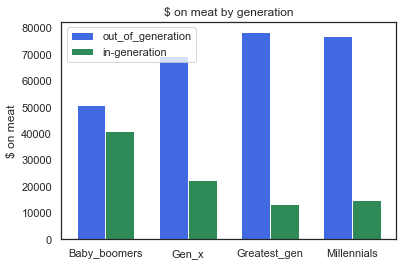

In [719]:
N = len(gen_df.columns)
generation_outs = []
generation_ins = []
labels = []
for generation in gen_df.columns:
    generation_group_sums = results.groupby(generation).sum()
    generation_outs.append(generation_group_sums.loc[0]['meat_per_person'])
    generation_ins.append(generation_group_sums.loc[1]['meat_per_person'])
    labels.append(generation)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, generation_outs, width, color='royalblue')

rects2 = ax.bar(ind+width, generation_ins, width, color='seagreen')

# add some
ax.set_ylabel('$ on meat')
ax.set_title('$ on meat by generation')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( labels )

ax.legend( (rects1[0], rects2[0]), ('out_of_generation', 'in-generation') )

plt.show()

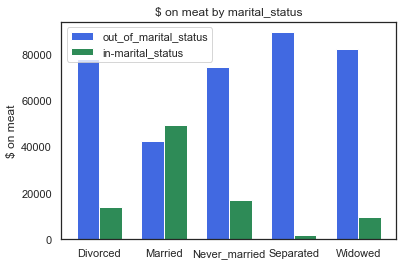

In [721]:
N = len(marital_df.columns)
marital_status_outs = []
marital_status_ins = []
labels = []
for marital_status in marital_df.columns:
    marital_status_group_sums = results.groupby(marital_status).sum()
    marital_status_outs.append(marital_status_group_sums.loc[0]['meat_per_person'])
    marital_status_ins.append(marital_status_group_sums.loc[1]['meat_per_person'])
    labels.append(marital_status)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, marital_status_outs, width, color='royalblue')

rects2 = ax.bar(ind+width, marital_status_ins, width, color='seagreen')

# add some
ax.set_ylabel('$ on meat')
ax.set_title('$ on meat by marital_status')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( labels )

ax.legend( (rects1[0], rects2[0]), ('out_of_marital_status', 'in-marital_status') )

plt.show()

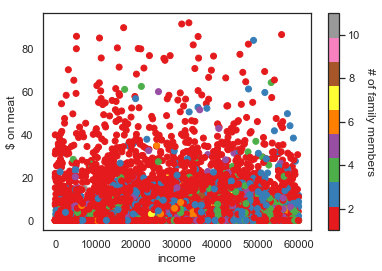

In [748]:
plt.scatter(np.where(results['FINCBEF5'] < 60000, results['FINCBEF5'], np.nan),\
            np.where(results['meat_per_person'] < 100, results['meat_per_person'], np.nan), c=results['FAM_SIZE'], cmap='Set1')
plt.xlabel('income')
plt.ylabel('$ on meat')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('# of family members', rotation=270)
plt.show()

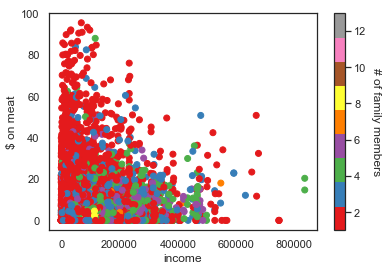

In [750]:
plt.scatter(results['FINCBEF5'],\
            np.where(results['meat_per_person'] < 100, results['meat_per_person'], np.nan), c=results['FAM_SIZE'], cmap='Set1')
plt.xlabel('income')
plt.ylabel('$ on meat')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('# of family members', rotation=270)
plt.show()

In [787]:
space_yticks = ['',codes.region[1],'',codes.region[2],'',codes.region[3],'',codes.region[4]]
# for i in range(1,11): 
#     if i % 2 == 0:
#         space_yticks.append(codes.region[i//4+1])
#     else:
#         space_yticks.append('')


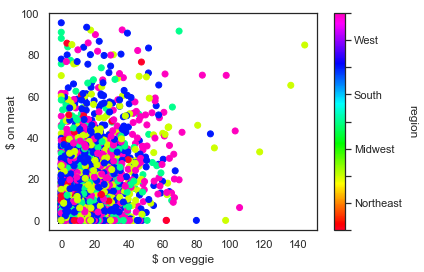

In [835]:
plt.scatter(np.where(results['veggie_per_person'] < 200, results['veggie_per_person'], np.nan),\
            np.where(results['meat_per_person'] < 100, results['meat_per_person'], np.nan), c=results['REGION'], cmap='gist_rainbow')
plt.xlabel('$ on veggie')
plt.ylabel('$ on meat')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_yticklabels(space_yticks)
cbar.set_label('region', rotation=270)
plt.show()

In [802]:
genders = results['SEX_REF']

In [803]:
genders

0          Male
1          Male
2        Female
3        Female
4          Male
5          Male
6        Female
7        Female
8          Male
9          Male
10       Female
11       Female
12         Male
13         Male
14         Male
15       Female
16       Female
17       Female
18       Female
19         Male
20         Male
21         Male
22         Male
23       Female
24       Female
25         Male
26         Male
27       Female
28       Female
29         Male
          ...  
11628    Female
11629    Female
11630    Female
11631    Female
11632      Male
11633      Male
11634    Female
11635    Female
11636    Female
11637    Female
11638      Male
11639      Male
11640      Male
11641      Male
11642    Female
11643    Female
11644      Male
11645      Male
11646      Male
11647      Male
11648      Male
11649      Male
11650    Female
11651    Female
11652    Female
11653    Female
11654    Female
11655    Female
11656      Male
11657      Male
Name: SEX_REF, Length: 1

In [816]:
space_yticks2 = ['0','','','','','1']

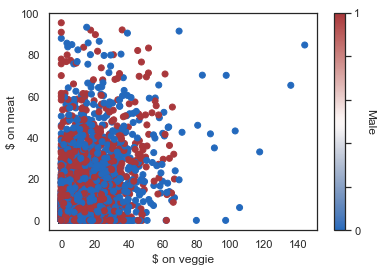

In [817]:
plt.scatter(np.where(results['veggie_per_person'] < 200, results['veggie_per_person'], np.nan),\
            np.where(results['meat_per_person'] < 100, results['meat_per_person'], np.nan), c=results['Male'], cmap='vlag')
plt.xlabel('$ on veggie')
plt.ylabel('$ on meat')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_yticklabels(space_yticks2)
cbar.set_label('Male', rotation=270)
plt.show()

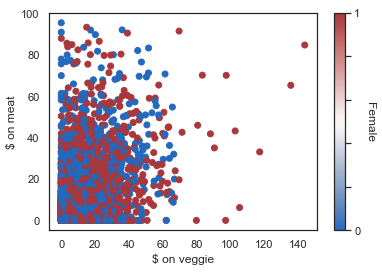

In [818]:
plt.scatter(np.where(results['veggie_per_person'] < 200, results['veggie_per_person'], np.nan),\
            np.where(results['meat_per_person'] < 100, results['meat_per_person'], np.nan), c=results['Female'], cmap='vlag')
plt.xlabel('$ on veggie')
plt.ylabel('$ on meat')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_yticklabels(space_yticks2)
cbar.set_label('Female', rotation=270)
plt.show()

In [751]:
results['HIGH_EDU'].value_counts()

15    3038
13    2319
16    2198
12    2124
14    1277
11     536
10     148
00      13
Name: HIGH_EDU, dtype: int64

In [753]:
print(scipy.stats.pearsonr(results['HIGH_EDU'].astype('int64'), results['FINCBEF5']))

(0.41128771159114264, 0.0)


In [770]:
results['meat_per_person'].std()
results['meat_per_person'].mean()
results['meat_per_person'].quantile(.25)

0.0

In [772]:
results['veggie_per_person'].std()
results['veggie_per_person'].mean()
results['veggie_per_person'].quantile(.75)

10.71

In [773]:
print(results['FINCBEF5'].mean())
print(results['FINCBEF5'].std())
results['FINCBEF5'].quantile(.75)

79445.80854715523
81276.61659531582


102204.0

meat score of 0


veggie score of 12 + 7.61


high income > 80000


high education = graduate

45 expected


50 actual

In [775]:
print((.25**4)*len(results))
results[(results['meat_per_person'] == 0) & (results['veggie_per_person'] >= 10.71) & (results['FINCBEF5'] > 102204)\
         & (results['Graduate_degree'] == 1)]

45.51953125


,INC_RNKM,INC_RNK5,INC_RNK4,INC_RNK3,INC_RNK2,INC_RNK1,INC_RANK,NEWID,AGE_REF,AGE_REF_,...,Married,Never_married,Separated,Widowed,family_size,Fam_greater_than_4,Fam_one_member,Fam_two_members,Fam_three_members,Fam_four_members
93,0.945627,0.945768,0.944118,0.945443,0.945167,0.945759,0.976474,03609831,56,D,...,1,0,0,0,2,0,0,1,0,0
94,0.946012,0.946154,0.944504,0.945829,0.945553,0.946145,0.976859,03609832,56,D,...,1,0,0,0,2,0,0,1,0,0
108,0.881524,0.875586,0.876512,0.878808,0.877897,0.880427,0.908729,03610012,72,D,...,1,0,0,0,2,0,0,1,0,0
761,0.903310,0.903511,0.901642,0.904261,0.902492,0.902607,0.930488,03617191,52,D,...,1,0,0,0,2,0,0,1,0,0
797,0.923693,0.922768,0.920408,0.922797,0.920721,0.921245,0.946806,03617661,75,D,...,1,0,0,0,2,0,0,1,0,0
889,0.987702,0.987249,0.987300,0.987601,0.987090,0.986766,0.992592,03618802,37,D,...,1,0,0,0,2,0,0,1,0,0
936,0.967301,0.966291,0.967329,0.966179,0.966208,0.967447,0.962127,03619281,56,D,...,1,0,0,0,3,0,0,0,1,0
1182,0.907047,0.906308,0.904696,0.906885,0.906116,0.905240,0.933835,03622121,63,D,...,1,0,0,0,2,0,0,1,0,0
1353,0.978124,0.976830,0.977755,0.977647,0.977987,0.977791,0.982154,03623782,64,D,...,1,0,0,0,2,0,0,1,0,0
1472,0.993827,0.994096,0.993608,0.994011,0.992954,0.993073,0.992169,03625132,74,D,...,1,0,0,0,3,0,0,0,1,0


In [776]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        meat_per_person   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     97.91
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:35:57   Log-Likelihood:                -47480.
No. Observations:               11653   AIC:                         9.506e+04
Df Residuals:                   11604   BIC:                         9.542e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.5788      0.348      1.661      0.097      -0.104       1.262
OCC_teacher                 -0.3151      0.529     -0.596      0.551      -1.352       0.722
OCC_professional             0.0685      0.700      0.098      0.922      -1.303       1.440
OCC_admin                   -0.4456      0.447     -0.997      0.319      -1.321       0.430
OCC_retail                   1.0189      0.642      1.588      0.112      -0.239       2.277
OCC_sales                    0.1110      0.641      0.173      0.863      -1.146       1.368
OCC_technician              -1.2185      0.797     -1.528      0.126      -2.781       0.344
OCC_security                 0.0604      0.674      0.090      0.929      -1.260       1.381
OCC_household                0.0616      1.359      0.045      0.964      -2.602       2.725
OCC_service                 -1.1156      1.129     -0.989      0.323      -3.328       1.097
OCC_machinist               -0.1129      0.476     -0.237      0.812      -1.046       0.820
OCC_driver                   1.0048      0.621      1.618      0.106      -0.213       2.222
OCC_laborer                 -0.6379      0.702     -0.909      0.363      -2.014       0.738
OCC_mechanic                 0.3383      1.412      0.240      0.811      -2.429       3.105
OCC_construction            -1.1365      2.252     -0.505      0.614      -5.551       3.278
OCC_farmer                   2.5892      2.204      1.175      0.240      -1.731       6.910
OCC_unknown                  0.3081      0.402      0.766      0.444      -0.480       1.096
No_schooling                -3.6426      3.504     -1.040      0.299     -10.511       3.225
Elementary_school           -0.1940      1.149     -0.169      0.866      -2.446       2.058
Some_high_school             4.0788      0.745      5.478      0.000       2.619       5.538
High_school_graduate         0.7553      0.575      1.313      0.189      -0.372       1.883
Some_college                 0.3973      0.571      0.696      0.487      -0.722       1.516
Associate_degree             0.7653      0.620      1.235      0.217      -0.450       1.980
Bachelor_degree             -0.1218      0.567     -0.215      0.830      -1.233       0.989
Graduate_degree             -1.4596      0.605     -2.412      0.016      -2.646      -0.274
Q("Income_0-20000")         -0.1879      0.336     -0.560      0.576      -0.846       0.470
Q("Income_20000-40000")      0.0597      0.287      0.208      0.836      -0.504       0.623
Q("Income_40000-60000")      0.3958      0.304      1.304      0.192      -0.199       0.991
Q("Income_60000-80000")     -0.2057      0.354     -0.581      0.561      -0.899       0.488
Q("Income_80000-840000")     0.5170      0.290      1.782      0.075      -0.052       1.086
Northeast     

In [833]:
space_yticks2 = [codes.region[1],'',codes.region[2],'','','',codes.region[3],'',codes.region[4]]

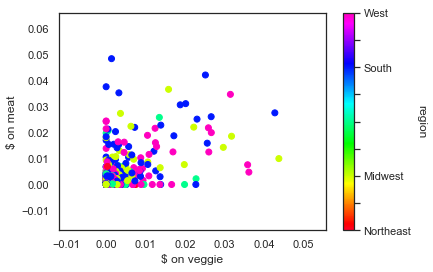

In [887]:
plt.scatter(np.where(results['veggie_per_person']/results['FINCBEF5'] < .05, results['veggie_per_person']/results['FINCBEF5'], np.nan),\
            np.where(results['meat_per_person']/results['FINCBEF5'] < .05, results['meat_per_person']/results['FINCBEF5'], np.nan), c=results['REGION'], cmap='gist_rainbow')
plt.xlabel('$ on veggie')
plt.ylabel('$ on meat')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_yticklabels(space_yticks2)
cbar.set_label('region', rotation=270)
plt.show()

In [895]:
import sys
meat_above_zero_df = results[(results['meat_per_person'] > 0)]
meat_above_zero_df['meat_log'] = np.log(meat_above_zero_df['meat_per_person'])
meat_above_zero_df['lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
regions = '+'.join(['Northeast','Midwest','West','South'])
education_levels = '+'.join(edu_df.columns)
income_level = '")+Q("'.join(income_df.columns)
income_level = 'Q("' + income_level + '")'
generations = '+'.join(gen_df.columns)
genders = '+'.join(sex_df.columns)
fam_sizes = '+'.join(fam_size_df.columns)
marital_statuses = '+'.join(marital_df.columns)
meat_above_zero_df['age_std'] = meat_above_zero_df['AGE_REF'].std()
meat_above_zero_df['income_std'] = meat_above_zero_df['FINCBEF5'].std()
lr_model9 = ols(formula='meat_log~'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes+'+lonely_rich_man+age_std+income_std',data=meat_above_zero_df).fit()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [896]:
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               meat_log   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     75.05
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:07:58   Log-Likelihood:                -9153.6
No. Observations:                7336   AIC:                         1.838e+04
Df Residuals:                    7301   BIC:                         1.862e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  5.89e-10   3.23e-10      1.826      0.068   -4.34e-11    1.22e-09
No_schooling                -0.3982      0.281     -1.419      0.156      -0.948       0.152
Elementary_school            0.0470      0.092      0.512      0.609      -0.133       0.227
Some_high_school             0.1189      0.059      2.003      0.045       0.003       0.235
High_school_graduate         0.0769      0.047      1.623      0.105      -0.016       0.170
Some_college                 0.0651      0.047      1.383      0.167      -0.027       0.157
Associate_degree             0.0787      0.050      1.573      0.116      -0.019       0.177
Bachelor_degree              0.0218      0.046      0.470      0.639      -0.069       0.113
Graduate_degree             -0.0101      0.048     -0.209      0.834      -0.105       0.085
Q("Income_0-20000")         -0.0475      0.025     -1.875      0.061      -0.097       0.002
Q("Income_20000-40000")     -0.0232      0.021     -1.093      0.274      -0.065       0.018
Q("Income_40000-60000")     -0.0115      0.022     -0.526      0.599      -0.055       0.031
Q("Income_60000-80000")      0.0083      0.025      0.327      0.743      -0.041       0.058
Q("Income_80000-840000")     0.0739      0.020      3.662      0.000       0.034       0.114
Northeast                    0.1279      0.054      2.386      0.017       0.023       0.233
Midwest                      0.0181      0.053      0.340      0.734      -0.086       0.122
West                         0.0817      0.053      1.548      0.122      -0.022       0.185
South                        0.0925      0.051      1.814      0.070      -0.007       0.192
veggie_per_person            0.0163      0.001     20.781      0.000       0.015       0.018
EGGS                         0.0481      0.004     11.815      0.000       0.040       0.056
OILS                         0.0211      0.002     11.285      0.000       0.017       0.025
NONALBEV                     0.0075      0.001     10.096      0.000       0.006       0.009
SMOKSUPP                     0.0024      0.001      4.087      0.000       0.001       0.004
ALCBEV                       0.0015      0.000      4.731      0.000       0.001       0.002
Baby_boomers                 0.0652      0.016      3.977      0.000       0.033       0.097
Gen_x                        0.0184      0.019      0.968      0.333      -0.019       0.056
Greatest_gen                -0.0352      0.026     -1.375      0.169      -0.085       0.015
Millennials                 -0.0484      0.021     -2.295      0.022      -0.090      -0.007
Female                      -0.0255      0.010     -2.477      0.013      -0.046      -0.005
Male                         0.0255      0.010      2.477      0.013       0.005       0.046
Divorced      

 
0.741 x - 1.522


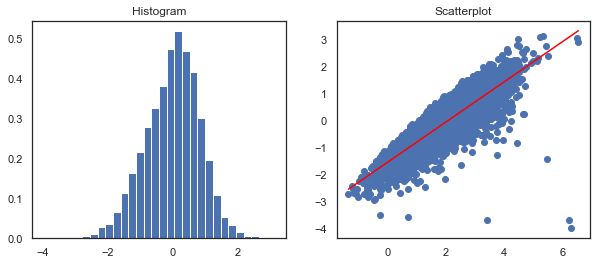

In [897]:
checkresiduals(meat_above_zero_df, 'meat_log', lr_model9)